# Part One: N-gram language model

In [1]:
import re

In [2]:
source_file = "/kaggle/input/amharic-corpus/GPAC.txt"

### Load the corpus
We need to first load the corpus and remove any unwanted characters and normalize whitespaces

In [3]:
def preprocess_text(text):
    """
    Preprocess a line of text by removing unwanted characters and normalizing whitespace.

    Args:
    text (str): The input text to preprocess.

    Returns:
    str: The preprocessed text.
    """
    # Remove unwanted characters
    text = re.sub(r"[^\w\s]", "", text, flags=re.UNICODE)
    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [4]:
def load_file_in_chunks(file_path, chunk_size=1024):
    """
    A generator to read a multiline file in chunks and preprocess each chunk,
    ensuring no words are split across chunks.

    Args:
    file_path (str): Path to the text file.
    chunk_size (int): Number of characters to read per chunk.

    Yields:
    str: A preprocessed chunk from the file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        buffer = ""
        for line in file:
            buffer += line.strip() + " "  # Add the line to the buffer with a space
            while len(buffer) >= chunk_size:
                chunk, buffer = buffer[:chunk_size].rsplit(" ", 1)  # Split at the last space
                yield preprocess_text(chunk)
        if buffer:  # Yield any remaining text after processing all lines
            yield preprocess_text(buffer)

In [5]:
from collections import deque

### N-gram Generator

In [6]:
def generate_ngrams(chunks, n):
    """
    Generate n-grams from lines of text.

    Args:
    chunks (iterable): An iterable containing chunks of text.
    n (int): The size of the n-grams.

    Yields:
    tuple: Each n-gram as a tuple.
    """
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer.")
    
    buffer = deque(maxlen=n)
    for chunk in chunks:
        if not isinstance(chunk, str):
            raise ValueError("Each element in lines must be a string.")
        
        words = chunk.split()
        for word in words:
            buffer.append(word)
            if len(buffer) == n:
                yield buffer[0] if n == 1 else tuple(buffer)

In [7]:
import itertools

In [8]:
chunks = load_file_in_chunks(source_file)

sample = itertools.islice(chunks, 10)
print(list(sample))

['ምን መሰላችሁ አንባቢያን ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት ልትታደመው ያልቻለችው የአለም የእግር ኳስ ዋ ለ19ኛ ጊዜ በደቡብ አፍሪካ ሲጠጣ በሩቅ እያየች አንጀቷ ባረረ ልክ በአመቱ በለስ ቀናትና ሌላ ዋ ልትታደም ሁለት ልጆቿን ወደ ደቡብ አፍሪካ ላከች6ኛው ቢግ ብራዘርስ አፍሪካ አብሮ የመኖር ውድድር በደቡብ አፍሪካ ተካሂዷል ከተለያዩ 14 የአፍሪካ አገራት የተውጣጡ 26 ያህል ተሳታፊዎች የተካፈሉበት ይህ ውድድር ግለሰቦች በፈታኝ ሁኔታ ውስጥ በማለፍ ብቃታቸውን የሚያስመሰክሩበት መሆኑን ሰምተናል የሚገጥሟቸውን የተለያዩ ፈተናዎች በትእግስትና በጥበብ ማለፍ ከሌሎች ጋር ተስማምቶ መዝለቅ ችግሮችን በብልጠት መፍታት ወዘተ በየጊዜው ከሚደረገው ቅነሳ ተርፈው ለ91 ቀናት ያህል በውድድሩ መቆየት የቻሉ ሁለት ተወዳዳሪዎች እያንዳንዳቸው 200 ሺህ ዶላር እንደሚሸለሙም ሲናገር ነበር በዘንድሮው ውድድር አገራችን ዳኒ እና ሃኒ የተባሉ ሁለት ወጣቶችን ብታሰልፍም ዳኒ ቀደም ብሎ የቅነሳው ሰለባ ሲሆን ሃኒም በቅርቡ ከውድድር ውጭ ሆናለችይህቺን የአገሪቱ ብቸኛ ተስፋ ወደ አሸናፊነት ለማሸጋገር የህዝብ የድጋፍ ድም ወሳኝ መሆኑን የተገነዘበው ወዳጄ ነው እንግዲህ 835 የሚል አገራዊ ጥሪ ያስተላለፈልኝ ያኔ ሃኒ ከውድድሩ ከመሰናበቷ በፊትወዳጄ የአገሩን ስም በአሸናፊነት የማስጠራት ከፍተኛ ጉጉት አገሬ እንዳትሸነፍ የሚል ከፍተኛ ስጋት እንዳደረበት ይሰማኛል ጉጉቱ ሳይሆን ስጋቱ የወዳጄን የዋህነት ሃኒም ኢትዮጵያም ይሸነፉ ይሆን በሚል እንዲህ ከንቱ ስጋት የሚያንገበግባቸውን አገር ወዳድ ዜጐች እኔ የዋሆች እላቸዋለሁየዋሆች ሆይአትስጉ ስለ ሃኒም ስለ ኢትዮጵያም አትስጉ ውድድሩ ቢግ ብራዘርስ አፍሪካ በአርቴፊሻል ፈተናዎች', 'ው']


In [9]:
chunks = load_file_in_chunks(source_file)

unigrams = generate_ngrams(chunks, 1)
print("Samples from unigrams generated from the file")

sample_unigrams = itertools.islice(unigrams, 10)

for unigram in sample_unigrams:
    print(unigram)

Samples from unigrams generated from the file
ምን
መሰላችሁ
አንባቢያን
ኢትዮጵያ
በተደጋጋሚ
ጥሪው
ደርሷት
ልትታደመው
ያልቻለችው
የአለም


In [10]:
chunks = load_file_in_chunks(source_file)

bigrams = generate_ngrams(chunks, 2)
print("Samples from unigrams generated from the file")

sample_bigrams = itertools.islice(bigrams, 10)

for bigram in sample_bigrams:
    print(bigram)

Samples from unigrams generated from the file
('ምን', 'መሰላችሁ')
('መሰላችሁ', 'አንባቢያን')
('አንባቢያን', 'ኢትዮጵያ')
('ኢትዮጵያ', 'በተደጋጋሚ')
('በተደጋጋሚ', 'ጥሪው')
('ጥሪው', 'ደርሷት')
('ደርሷት', 'ልትታደመው')
('ልትታደመው', 'ያልቻለችው')
('ያልቻለችው', 'የአለም')
('የአለም', 'የእግር')


### Calculate the frequency and probabilities of the ngrams

In [11]:
from collections import defaultdict

In [12]:
def calculate_ngram_frequencies(ngrams):
    """
    Calculate the frequencies of n-grams from an iterable of n-grams.

    Args:
    ngrams (iterable): An iterable of n-grams.

    Returns:
    dict: A dictionary with n-grams as keys and their frequencies as values.
    int: The total number of n-grams generated.
    """
    ngram_frequencies = defaultdict(int)
    total_ngrams = 0

    for ngram in ngrams:
        ngram_frequencies[ngram] += 1
        total_ngrams += 1

    return ngram_frequencies, total_ngrams

In [13]:
def calculate_ngram_probabilities(ngram_frequencies, total_ngrams):
    """
    Calculate the probabilities of n-grams.

    Args:
    ngram_frequencies (dict): A dictionary with n-grams as keys and their frequencies as values.
    total_ngrams (int): The total number of n-grams.

    Returns:
    dict: A dictionary with n-grams as keys and their probabilities as values.
    """
    ngram_probabilities = {
        ngram: freq / total_ngrams for ngram, freq in ngram_frequencies.items()
    }
    return ngram_probabilities

In [14]:
def get_top_ngrams(ngram_probabilities, top_n=10):
    """
    Get the top n most likely n-grams.

    Args:
    ngram_probabilities (dict): A dictionary with n-grams as keys and their probabilities as values.
    top_n (int): The number of top n-grams to return.

    Returns:
    list of tuple: A list of the top n-grams and their probabilities, sorted by probability.
    """
    sorted_ngrams = sorted(ngram_probabilities.items(), key=lambda item: item[1], reverse=True)
    return sorted_ngrams[:top_n]

In [15]:
unigrams_frequencies, total_unigrams = calculate_ngram_frequencies(unigrams)

unigrams_probabilities = calculate_ngram_probabilities(unigrams_frequencies, total_unigrams)
top_unigrams = get_top_ngrams(unigrams_probabilities, top_n=10)

print("The top ten unigrams by their probability")

for unigram, prob in top_unigrams:
    print(f"{unigram}: {prob:.6f}")

The top ten unigrams by their probability
አፍሪካ: 0.027933
ሁለት: 0.016760
ውድድር: 0.016760
ሃኒም: 0.016760
ዋ: 0.011173
በደቡብ: 0.011173
ወደ: 0.011173
ቢግ: 0.011173
ብራዘርስ: 0.011173
ያህል: 0.011173


In [16]:
bigrams_frequencies, total_bigrams = calculate_ngram_frequencies(bigrams)

bigrams_probabilities = calculate_ngram_probabilities(bigrams_frequencies, total_bigrams)
top_bigrams = get_top_ngrams(bigrams_probabilities, top_n=10)

print("The top ten bigrams by their probability")

for bigram, prob in top_bigrams:
    print(f"{bigram}: {prob:.6f}")

The top ten bigrams by their probability
('በደቡብ', 'አፍሪካ'): 0.011236
('ቢግ', 'ብራዘርስ'): 0.011236
('ብራዘርስ', 'አፍሪካ'): 0.011236
('የእግር', 'ኳስ'): 0.005618
('ኳስ', 'ዋ'): 0.005618
('ዋ', 'ለ19ኛ'): 0.005618
('ለ19ኛ', 'ጊዜ'): 0.005618
('ጊዜ', 'በደቡብ'): 0.005618
('አፍሪካ', 'ሲጠጣ'): 0.005618
('ሲጠጣ', 'በሩቅ'): 0.005618


### Calculate the conditional probabilities of the words in the corpus

In [17]:
def calculate_conditional_probabilities(unigram_frequencies, bigram_frequencies):
    """
    Calculate conditional probabilities of words given the previous word using bigrams.

    Args:
    unigram_frequencies (dict): A dictionary with unigrams as keys and their frequencies as values.
    bigram_frequencies (dict): A dictionary with bigrams as keys and their frequencies as values.

    Returns:
    dict: A nested dictionary where the outer key is the first word, the inner key is the second word,
          and the value is the conditional probability P(w2 | w1).
    """
    if not unigram_frequencies or not bigram_frequencies:
        raise ValueError("Unigram and bigram frequencies must not be empty.")

    conditional_probabilities = defaultdict(dict)

    for (w1, w2), bigram_count in bigram_frequencies.items():
        # Avoid division by zero and ensure valid unigram frequency
        unigram_count = unigram_frequencies.get(w1, 0)
        if unigram_count > 0:
            conditional_probabilities[w1][w2] = bigram_count / unigram_count
        else:
            conditional_probabilities[w1][w2] = 0.0

    return dict(conditional_probabilities)

In [18]:
conditional_probabilities = calculate_conditional_probabilities(unigrams_frequencies, bigrams_frequencies)

print('Some samples from conditional probabilities before removing stopwords')

for w1, w2_probs in conditional_probabilities.items():
    count = 0
    for w2, prob in w2_probs.items():
        print(f"P({w2} | {w1}) = {prob:.6f}")
        count += 1
        if count == 5:
            break

Some samples from conditional probabilities before removing stopwords
P(ኳስ | የእግር) = 1.000000
P(ዋ | ኳስ) = 1.000000
P(ለ19ኛ | ዋ) = 0.500000
P(ልትታደም | ዋ) = 0.500000
P(ጊዜ | ለ19ኛ) = 1.000000
P(በደቡብ | ጊዜ) = 1.000000
P(አፍሪካ | በደቡብ) = 1.000000
P(ሲጠጣ | አፍሪካ) = 0.200000
P(ላከች6ኛው | አፍሪካ) = 0.200000
P(አብሮ | አፍሪካ) = 0.200000
P(ተካሂዷል | አፍሪካ) = 0.200000
P(በአርቴፊሻል | አፍሪካ) = 0.200000
P(በሩቅ | ሲጠጣ) = 1.000000
P(እያየች | በሩቅ) = 1.000000
P(አንጀቷ | እያየች) = 1.000000
P(ባረረ | አንጀቷ) = 1.000000
P(ልክ | ባረረ) = 1.000000
P(በአመቱ | ልክ) = 1.000000
P(በለስ | በአመቱ) = 1.000000
P(ቀናትና | በለስ) = 1.000000
P(ሌላ | ቀናትና) = 1.000000
P(ዋ | ሌላ) = 1.000000
P(ሁለት | ልትታደም) = 1.000000
P(ልጆቿን | ሁለት) = 0.333333
P(ተወዳዳሪዎች | ሁለት) = 0.333333
P(ወጣቶችን | ሁለት) = 0.333333
P(ወደ | ልጆቿን) = 1.000000
P(ደቡብ | ወደ) = 0.500000
P(አሸናፊነት | ወደ) = 0.500000
P(አፍሪካ | ደቡብ) = 1.000000
P(ቢግ | ላከች6ኛው) = 1.000000
P(ብራዘርስ | ቢግ) = 1.000000
P(አፍሪካ | ብራዘርስ) = 1.000000
P(የመኖር | አብሮ) = 1.000000
P(ውድድር | የመኖር) = 1.000000
P(በደቡብ | ውድድር) = 0.333333
P(ግለሰቦች | ውድድር) = 0.333333
P(አ

In [19]:
def load_stopwords(file_path: str) -> set[str]:
    '''
    Load a set of stopwords from a file.
    
    Args:
    file_path: str: The path to the file containing stopwords.
    
    Returns:
    set[str]: A set of stopwords.
    '''
    with open(file_path, "r", encoding="utf-8") as f:
        stopwords = f.read().splitlines()
    return set(stopwords)

In [20]:
stopword_file = "/kaggle/input/stopwords-am/stopwords-am.txt"
stopwords = load_stopwords(stopword_file)

In [21]:
def process_chunks_and_remove_stopwords(chunks, stopwords: set[str]) -> str:
    """
    A generator to process chunks of text, remove stopwords, and yield each cleaned chunk.

    Args:
    chunks (iterable): An iterable of preprocessed text chunks.
    stopwords (set[str]): A set of stopwords to remove.

    Yields:
    str: A cleaned chunk with stopwords removed.
    """
    for chunk in chunks:
        # Tokenize the chunk into words
        tokens = chunk.split()
        
        # Remove stopwords from tokens
        cleaned_tokens = [token for token in tokens if token not in stopwords]
        
        # Yield the cleaned chunk as a space-separated string of tokens
        yield " ".join(cleaned_tokens)

In [22]:
unprocessed_chunks = load_file_in_chunks(source_file)
processed_chunks = process_chunks_and_remove_stopwords(unprocessed_chunks, stopwords)

sample = itertools.islice(processed_chunks, 10)

print(list(sample))

['ምን መሰላችሁ አንባቢያን ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት ልትታደመው ያልቻለችው የአለም የእግር ኳስ ዋ ለ19ኛ ጊዜ በደቡብ አፍሪካ ሲጠጣ በሩቅ እያየች አንጀቷ ባረረ ልክ በአመቱ በለስ ቀናትና ዋ ልትታደም ሁለት ልጆቿን ደቡብ አፍሪካ ላከች6ኛው ቢግ ብራዘርስ አፍሪካ አብሮ የመኖር ውድድር በደቡብ አፍሪካ ተካሂዷል ከተለያዩ 14 የአፍሪካ አገራት የተውጣጡ 26 ያህል ተሳታፊዎች የተካፈሉበት ውድድር ግለሰቦች በፈታኝ ሁኔታ በማለፍ ብቃታቸውን የሚያስመሰክሩበት መሆኑን ሰምተናል የሚገጥሟቸውን የተለያዩ ፈተናዎች በትእግስትና በጥበብ ማለፍ ከሌሎች ተስማምቶ መዝለቅ ችግሮችን በብልጠት መፍታት ወዘተ በየጊዜው ከሚደረገው ቅነሳ ተርፈው ለ91 ቀናት ያህል በውድድሩ መቆየት የቻሉ ሁለት ተወዳዳሪዎች 200 ሺህ ዶላር እንደሚሸለሙም ሲናገር በዘንድሮው ውድድር አገራችን ዳኒ ሃኒ የተባሉ ሁለት ወጣቶችን ብታሰልፍም ዳኒ ቀደም ብሎ የቅነሳው ሰለባ ሲሆን ሃኒም በቅርቡ ከውድድር ሆናለችይህቺን የአገሪቱ ብቸኛ ተስፋ አሸናፊነት ለማሸጋገር የህዝብ የድጋፍ ድም ወሳኝ መሆኑን የተገነዘበው ወዳጄ እንግዲህ 835 የሚል አገራዊ ጥሪ ያስተላለፈልኝ ያኔ ሃኒ ከውድድሩ ከመሰናበቷ በፊትወዳጄ የአገሩን ስም በአሸናፊነት የማስጠራት ከፍተኛ ጉጉት አገሬ እንዳትሸነፍ የሚል ከፍተኛ ስጋት እንዳደረበት ይሰማኛል ጉጉቱ ሳይሆን ስጋቱ የወዳጄን የዋህነት ሃኒም ኢትዮጵያም ይሸነፉ ይሆን በሚል እንዲህ ከንቱ ስጋት የሚያንገበግባቸውን አገር ወዳድ ዜጐች የዋሆች እላቸዋለሁየዋሆች ሆይአትስጉ ሃኒም ኢትዮጵያም አትስጉ ውድድሩ ቢግ ብራዘርስ አፍሪካ በአርቴፊሻል ፈተናዎች', 'ው']


In [23]:
unprocessed_chunks = load_file_in_chunks(source_file)
processed_chunks = process_chunks_and_remove_stopwords(unprocessed_chunks, stopwords)

processed_unigrams = generate_ngrams(processed_chunks, 1)

print("Samples from unigrams generated after removing stopwords")

sample_unigrams = itertools.islice(processed_unigrams, 10)

for unigram in sample_unigrams:
    print(unigram)

Samples from unigrams generated after removing stopwords
ምን
መሰላችሁ
አንባቢያን
ኢትዮጵያ
በተደጋጋሚ
ጥሪው
ደርሷት
ልትታደመው
ያልቻለችው
የአለም


In [24]:
unprocessed_chunks = load_file_in_chunks(source_file)
processed_chunks = process_chunks_and_remove_stopwords(unprocessed_chunks, stopwords)

processed_bigrams = generate_ngrams(processed_chunks, 2)

print("Samples from bigrams generated after removing stopwords")

sample_bigrams = itertools.islice(processed_bigrams, 10)

for unigram in sample_bigrams:
    print(unigram)

Samples from bigrams generated after removing stopwords
('ምን', 'መሰላችሁ')
('መሰላችሁ', 'አንባቢያን')
('አንባቢያን', 'ኢትዮጵያ')
('ኢትዮጵያ', 'በተደጋጋሚ')
('በተደጋጋሚ', 'ጥሪው')
('ጥሪው', 'ደርሷት')
('ደርሷት', 'ልትታደመው')
('ልትታደመው', 'ያልቻለችው')
('ያልቻለችው', 'የአለም')
('የአለም', 'የእግር')


In [25]:
processed_unigrams_frequencies, total_processed_unigrams = calculate_ngram_frequencies(processed_unigrams)

processed_unigrams_probabilities = calculate_ngram_probabilities(processed_unigrams_frequencies, total_processed_unigrams)
top_processed_unigrams = get_top_ngrams(processed_unigrams_probabilities, top_n=10)

print("The top ten unigrams by their probability after removing stopwords")

for unigram, prob in top_processed_unigrams:
    print(f"{unigram}: {prob:.6f}")

The top ten unigrams by their probability after removing stopwords
አፍሪካ: 0.030303
ሁለት: 0.018182
ውድድር: 0.018182
ሃኒም: 0.018182
ዋ: 0.012121
በደቡብ: 0.012121
ቢግ: 0.012121
ብራዘርስ: 0.012121
ያህል: 0.012121
መሆኑን: 0.012121


In [26]:
processed_bigrams_frequencies, total_processed_bigrams = calculate_ngram_frequencies(processed_bigrams)

processed_bigrams_probabilities = calculate_ngram_probabilities(processed_bigrams_frequencies, total_processed_bigrams)
top_processed_bigrams = get_top_ngrams(processed_bigrams_probabilities, top_n=10)

print("The top ten bigrams by their probability after removing stopwords")

for unigram, prob in top_processed_bigrams:
    print(f"{unigram}: {prob:.6f}")

The top ten bigrams by their probability after removing stopwords
('በደቡብ', 'አፍሪካ'): 0.012195
('ቢግ', 'ብራዘርስ'): 0.012195
('ብራዘርስ', 'አፍሪካ'): 0.012195
('ሃኒም', 'ኢትዮጵያም'): 0.012195
('የእግር', 'ኳስ'): 0.006098
('ኳስ', 'ዋ'): 0.006098
('ዋ', 'ለ19ኛ'): 0.006098
('ለ19ኛ', 'ጊዜ'): 0.006098
('ጊዜ', 'በደቡብ'): 0.006098
('አፍሪካ', 'ሲጠጣ'): 0.006098


In [27]:
conditional_probabilities = calculate_conditional_probabilities(processed_unigrams_frequencies, processed_bigrams_frequencies)

print('Some samples from conditional probabilities after removing stopwords')

for w1, w2_probs in conditional_probabilities.items():
    count = 0
    for w2, prob in w2_probs.items():
        print(f"P({w2} | {w1}) = {prob:.6f}")
        count += 1
        if count == 5:
            break

Some samples from conditional probabilities after removing stopwords
P(ኳስ | የእግር) = 1.000000
P(ዋ | ኳስ) = 1.000000
P(ለ19ኛ | ዋ) = 0.500000
P(ልትታደም | ዋ) = 0.500000
P(ጊዜ | ለ19ኛ) = 1.000000
P(በደቡብ | ጊዜ) = 1.000000
P(አፍሪካ | በደቡብ) = 1.000000
P(ሲጠጣ | አፍሪካ) = 0.200000
P(ላከች6ኛው | አፍሪካ) = 0.200000
P(አብሮ | አፍሪካ) = 0.200000
P(ተካሂዷል | አፍሪካ) = 0.200000
P(በአርቴፊሻል | አፍሪካ) = 0.200000
P(በሩቅ | ሲጠጣ) = 1.000000
P(እያየች | በሩቅ) = 1.000000
P(አንጀቷ | እያየች) = 1.000000
P(ባረረ | አንጀቷ) = 1.000000
P(ልክ | ባረረ) = 1.000000
P(በአመቱ | ልክ) = 1.000000
P(በለስ | በአመቱ) = 1.000000
P(ቀናትና | በለስ) = 1.000000
P(ዋ | ቀናትና) = 1.000000
P(ሁለት | ልትታደም) = 1.000000
P(ልጆቿን | ሁለት) = 0.333333
P(ተወዳዳሪዎች | ሁለት) = 0.333333
P(ወጣቶችን | ሁለት) = 0.333333
P(ደቡብ | ልጆቿን) = 1.000000
P(አፍሪካ | ደቡብ) = 1.000000
P(ቢግ | ላከች6ኛው) = 1.000000
P(ብራዘርስ | ቢግ) = 1.000000
P(አፍሪካ | ብራዘርስ) = 1.000000
P(የመኖር | አብሮ) = 1.000000
P(ውድድር | የመኖር) = 1.000000
P(በደቡብ | ውድድር) = 0.333333
P(ግለሰቦች | ውድድር) = 0.333333
P(አገራችን | ውድድር) = 0.333333
P(ከተለያዩ | ተካሂዷል) = 1.000000
P(14 | ከተለያዩ) = 1.0

## Calculate sentence probability

In [28]:
def calculate_sentence_probability(sentence, n, ngram_frequencies, total_ngrams):
    """
    Calculate the probability of a sentence using n-grams.

    Args:
    sentence (str): The sentence to evaluate.
    n (int): The size of the n-grams.
    ngram_frequencies (dict): Dictionary of n-gram frequencies.
    total_ngrams (int): Total number of n-grams in the training data.

    Returns:
    float: The probability of the sentence.
    """
    tokens = sentence.split()  # Tokenize the sentence
    if len(tokens) < n:
        raise ValueError("The sentence has fewer words than the n-gram size.")

    probability = 1.0
    smoothing = 1e-6  # Additive smoothing for unseen n-grams

    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i : i + n])  # Create an n-gram as a tuple
        freq = ngram_frequencies.get(ngram, 0)
        prob = (freq + smoothing) / (total_ngrams + smoothing * len(ngram_frequencies))
        probability *= prob

    return probability

In [29]:
test_sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት"

for n in range(1, 5):
    print(f"\nCalculating probability for '{test_sentence}' using {n}-grams:")

    ngrams = generate_ngrams(source_file, n)

    ngram_frequencies, total_ngrams = calculate_ngram_frequencies(ngrams)

    sentence_prob = calculate_sentence_probability(test_sentence, n, ngram_frequencies, total_ngrams)
    print(f"{n}-gram Sentence Probability: {sentence_prob:.6e}")


Calculating probability for 'ኢትዮጵያ ታሪካዊ ሀገር ናት' using 1-grams:
1-gram Sentence Probability: 5.335707e-31

Calculating probability for 'ኢትዮጵያ ታሪካዊ ሀገር ናት' using 2-grams:
2-gram Sentence Probability: 2.143341e-23

Calculating probability for 'ኢትዮጵያ ታሪካዊ ሀገር ናት' using 3-grams:
3-gram Sentence Probability: 8.163249e-16

Calculating probability for 'ኢትዮጵያ ታሪካዊ ሀገር ናት' using 4-grams:
4-gram Sentence Probability: 2.941174e-08


## Random Sentences Generation Using N-grams

In [30]:
import random

In [41]:
def generate_random_sentence_for_ngrams(seed_word, ngram_probabilities, n, reps = 10):
    sentence = [*seed_word]
    for _ in range(reps): 
        next_words = [word[-1] for word in ngram_probabilities if word[:-1] == tuple(sentence[-(n-1):])]
        if not next_words:
            break

        next_word = random.choice(next_words)
        sentence.append(next_word)
        
    return " ".join(sentence)

In [43]:
seed_word = random.choice(list(processed_bigrams_probabilities.keys()))

generated_sentence = generate_random_sentence_for_ngrams(seed_word, processed_bigrams_probabilities, 2)
print("Generated random sentence using bigrams:", generated_sentence)

Generated random sentence using bigrams: አገራችን ዳኒ ሃኒ ከውድድሩ ከመሰናበቷ በፊትወዳጄ የአገሩን ስም በአሸናፊነት የማስጠራት ከፍተኛ ስጋት


> **We can conclude from the above results that, as 𝑛 increases, the generated sentences become more grammatically coherent but also more constrained, often mimicking specific patterns in the training data.**

## Word Cloud Generation

In [44]:
font_file = "/kaggle/input/fonts-am/washrab.ttf"

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [48]:
def generate_word_cloud(ngram_frequencies, title, font_path=None):
    """
    Generate and display a word cloud from n-gram frequencies.

    Args:
    ngram_frequencies (dict): A dictionary of n-grams and their frequencies.
    title (str): Title for the word cloud plot.
    font_path (str): Path to the font file for Amharic text (default is None).
    """
    # Flatten n-grams to a single string for WordCloud
    word_freq = {' '.join(ngram): freq for ngram, freq in ngram_frequencies.items()}

    # Generate the word cloud
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


Word Cloud for bigrams (Before Stopword Removal):


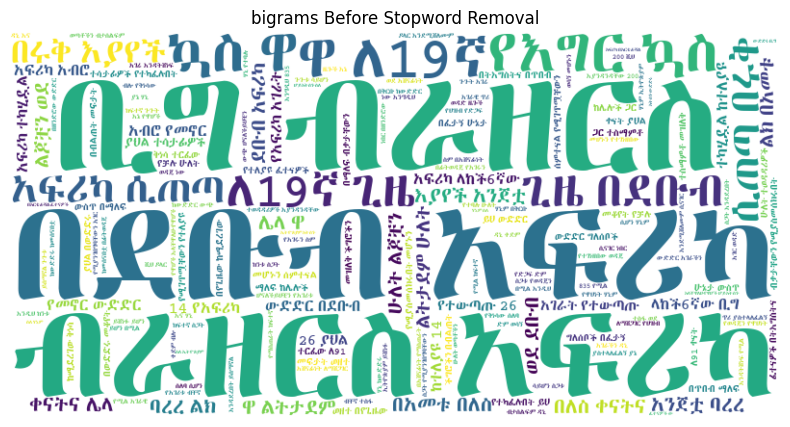

In [49]:
print(f"\nWord Cloud for bigrams (Before Stopword Removal):")
generate_word_cloud(bigrams_frequencies, f"bigrams Before Stopword Removal", font_file)


Word Cloud for bigrams (After Stopword Removal):


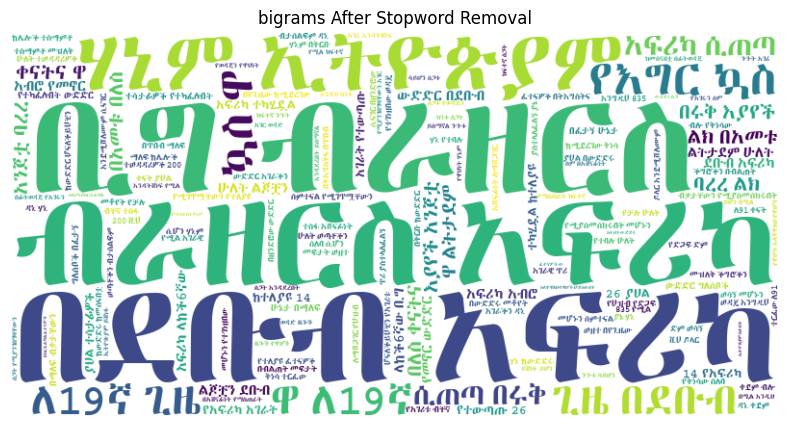

In [50]:
print(f"\nWord Cloud for bigrams (After Stopword Removal):")
generate_word_cloud(processed_bigrams_frequencies, f"bigrams After Stopword Removal", font_file)

# Part Two: Intrinsic Evaluation

In [51]:
import math

In [52]:
def split_tokens(tokens, split_ratio=0.8):
    """
    Split tokens into training and testing sets.

    Args:
    tokens (list): List of tokens to split.
    split_ratio (float): Proportion of tokens to use for training.

    Returns:
    tuple: (train_tokens, test_tokens)
    """
    split = int(len(tokens) * split_ratio)
    return tokens[:split], tokens[split:]

In [53]:
def compute_perplexity(tokens, n, ngram_probabilities):
    """
    Compute the perplexity of a token sequence given n-gram probabilities.

    Args:
    tokens (list): List of tokens to evaluate.
    n (int): The size of n-grams.
    ngram_probabilities (dict): Dictionary of n-gram probabilities.

    Returns:
    float: The perplexity score.
    """
    if len(tokens) < n:
        raise ValueError("The number of tokens is less than the n-gram size.")

    log_prob_sum = 0
    count = 0

    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i : i + n])  # Convert to tuple to match ngram_probabilities keys
        prob = ngram_probabilities.get(
            ngram, 1e-6
        )  # Assign a small probability to unseen n-grams
        log_prob_sum += math.log(prob)
        count += 1

    avg_log_prob = log_prob_sum / count
    perplexity = math.exp(-avg_log_prob)

    return perplexity

In [54]:
with open(source_file, "r", encoding="utf-8") as f:
    tokens = [word for line in f for word in line.strip().split()]

train_tokens, test_tokens = split_tokens(tokens)

for n in range(1, 5):
    train_ngrams = generate_ngrams(train_tokens, n)

    train_ngram_frequencies, total_train_ngrams = calculate_ngram_frequencies(train_ngrams)
    train_ngram_probabilities = calculate_ngram_probabilities(train_ngram_frequencies, total_train_ngrams)

    perp = compute_perplexity(test_tokens, n, train_ngram_probabilities)
    print(f"{n}-gram Perplexity: {perp}")

1-gram Perplexity: 1000000.0043125605
2-gram Perplexity: 1434142.9669529384
3-gram Perplexity: 3370201.68090673
4-gram Perplexity: 2807158.4989387062


# Part Three: Extrinsic Evaluation of N-gram Models

**Extrinsic evaluation** assesses the quality of an n-gram language model by embedding it into a downstream task and measuring the task's performance. A common task is text classification, where the model's ability to capture contextual language properties can improve classification accuracy.

For this task, we’ll evaluate the n-gram models using text classification:

1. **Prepare Data**: Use a labeled dataset where each sentence has a category (e.g., sentiment, topic).
2. **Feature Extraction**: Use n-gram probabilities to generate features for each sentence.
3. **Train a Classifier**: Train a simple classifier (e.g., Naive Bayes) using these features.
4. **Measure Performance**: Evaluate classification performance using metrics like accuracy.

In [74]:
def extract_features_from_chunks(chunks, n, ngram_probabilities):
    """
    Extract n-gram probability features from chunks of processed text.

    Args:
    chunks (iterable): Iterable of preprocessed text chunks.
    n (int): The size of the n-grams.
    ngram_probabilities (dict): Dictionary of n-gram probabilities.

    Returns:
    list: List of feature vectors for each sentence or chunk.
    """
    features = []

    for chunk in chunks:
        sentences = chunk.splitlines()  # Assume sentences are separated by newlines
        for sentence in sentences:
            tokens = sentence.split()
            sentence_prob = 1e-6  # Initialize with a small probability for unseen sentences
            for i in range(len(tokens) - n + 1):
                ngram = tuple(tokens[i:i+n])
                sentence_prob += ngram_probabilities.get(ngram, 1e-6)
            features.append(math.log(sentence_prob))  # Use log probability as a feature

    return features


def evaluate_ngram_model_with_chunks(processed_chunks, labels, ngram_probabilities, n):
    """
    Perform extrinsic evaluation using text classification and processed chunks.

    Args:
    processed_chunks (iterable): Iterable of preprocessed text chunks.
    labels (list): List of corresponding labels for sentences or chunks.
    ngram_probabilities (dict): Dictionary of n-gram probabilities.
    n (int): The size of the n-grams.

    Returns:
    float: Classification accuracy.
    """
    # Extract features
    features = extract_features_from_chunks(processed_chunks, n, ngram_probabilities)

    # Ensure the number of features matches the number of labels
    if len(features) != len(labels):
        raise ValueError("Mismatch between the number of features and labels.")

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Train a classifier
    clf = MultinomialNB()
    clf.fit([[f] for f in X_train], y_train)

    # Predict and evaluate
    predictions = clf.predict([[f] for f in X_test])
    accuracy = accuracy_score(y_test, predictions)

    return accuracy


# Example Usage
if __name__ == "__main__":
    source_file = "path_to_labeled_corpus.txt"  # Replace with your corpus path
    stopwords = {"ናት", "እንደ", "ሀገር"}  # Example stopwords
    labels = ["history", "history", "economy", "education"]  # Replace with your labels

    # Step 1: Process and generate n-grams
    unprocessed_chunks = load_file_in_chunks(source_file)
    processed_chunks = process_chunks_and_remove_stopwords(unprocessed_chunks, stopwords)

    bigrams = generate_ngrams(processed_chunks, 2)
    ngram_frequencies, total_ngrams = calculate_ngram_frequencies(bigrams)
    ngram_probabilities = calculate_ngram_probabilities(ngram_frequencies, total_ngrams)

    # Step 2: Evaluate using text classification
    accuracy = evaluate_ngram_model_with_chunks(processed_chunks, labels, ngram_probabilities, n=2)
    print(f"2-gram Model Classification Accuracy: {accuracy:.2f}")


In [64]:
initial_sentence = tuple("ኢትዮጵያ ታሪካዊ ሀገር ናት".split())

completed_sentence_uni = generate_sentence(initial_sentence, processed_unigrams_probabilities, 1)
print("Completed sentence using Unigrams:", completed_sentence_uni)

Completed sentence using Unigrams: ኢትዮጵያ ታሪካዊ ሀገር ናት ሁኔታ እንደሚሸለሙም አገራት ግለሰቦች ወዳድ እንግዲህ ሆይአትስጉ አገራዊ ሰምተናል 14
Completed sentence using Bigrams: ኢትዮጵያ ታሪካዊ ሀገር ናት
